### Contexto

---

Rede Neural do tipo Perceptron de Multíplas Camadas com 3 entradas $x_1$, $x_2$ e $x_3$ e 10 neurônios em uma camada intermediária e um único neurônio na camada de saída para $y$

<img src="Fig/EPC5_Topologia_MLP_Projeto1.jpg" width="600">


### Bibliotecas utilizadas

---

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Tratamento dos dados

---

In [2]:
# Leitura dos dados

data = pd.read_csv('data_58_RNA.txt', delim_whitespace=True)

In [3]:
data

,x1,x2,x3,d
0,0.8799,0.7998,0.3972,0.8399
1,0.5700,0.5111,0.2418,0.6258
2,0.6796,0.4117,0.3370,0.6622
3,0.3567,0.2967,0.6037,0.5969
4,0.3866,0.8390,0.0232,0.5316
...,...,...,...,...
195,0.0339,0.4669,0.1526,0.3250
196,0.0080,0.8988,0.4201,0.5404
197,0.9955,0.8897,0.6175,0.9360
198,0.7408,0.5351,0.2732,0.6949


In [163]:
# Separacao dos dados

x1 = data['x1'].copy()
x2 = data['x2'].copy()
x3 = data['x3'].copy()
X = pd.concat([x1, x2, x3], axis=1)

d = data['d'].copy()

In [161]:
# Verifica a normalizacao

min = X.values.min()
max = X.values.max()

print(f'min = {min} \n max = {max}')

min = 0.0 
 max = 1.0


Já normalizado

In [164]:
# Adiciona coluna do limiar de ativacao = -1 (bias) no conjunto de dados
X['bias'] = -1

In [165]:
X = np.array(X)

d = np.array(d)
d = d.reshape(-1, 1)

### Treinamento da rede neural MLP

---

In [280]:
# valor maximo de epocas
MAX_EPOCA = int(10e+6)

# Taxa de aprendizado
n = 0.1

# Precisao
p = 10e-6

Funcao logistica (sigmoide):

$f(u) = 1 / (1 + e^{(-β*u)})$

sendo $β$ o fator de inclinacao da funcao e $u$ a entrada

In [8]:
def func_ativacao(u, beta):

    g = 1 / (1 + np.exp(-beta * u))

    return g

In [ ]:
# Plot Funcao de Ativacao

u = np.arange(-5,5,0.1)
resultado = func_ativacao(u, 0.5)

plt.figure(figsize=(8, 6))
plt.plot(u, resultado, label='Função Sigmoide', linewidth=2)
plt.xlabel('u')
plt.ylabel('g(u)')
plt.title('Função de Ativação Sigmoide')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
def func_ativacao_derivada(u, beta):
    
    gd = (beta * np.exp(-beta * u))/((np.exp(-beta * u) + 1) ** 2)

    return gd

In [ ]:
# Plot Funcao de Ativacao Derivada

u = np.arange(-5,5,0.1)
resultado = func_ativacao_derivada(u, 0.5)

plt.figure(figsize=(8, 6))
plt.plot(u, resultado, label='Função Sigmoide Derivada', linewidth=2)
plt.xlabel('u')
plt.ylabel('g(u)')
plt.title('Função de Ativação Sigmoide Derivada')
plt.grid(True)
plt.legend()
plt.show()

In [239]:
# X -> dados de entrada
# d -> saida desejada (alvo)
# n -> taxa de aprendizado
# MAX_EPOCA -> quantidade maxima de epcas de treinamento
# p -> precisao
# beta -> inclinacao das funcoes

def treinamento(X, d, n, MAX_EPOCA, p, beta):

    # Lista de matrizes de pesos sinapticos iniciais e ajustados
    lista_Wi_1 = []
    lista_Wi_2 = []
    lista_W_1_bp = []
    lista_W_2_bp = []

    for n_treino in range(5):

        print('-'*30)
        print(f'Treinamento numero: {n_treino + 1}')
        print('-'*30)
        
        # Contador de epocas
        epoca = 0

        # Vetor de erros
        erro = np.zeros(MAX_EPOCA)

        while(epoca < MAX_EPOCA):

            # print(f'epoca {epoca}')

            #######################
            # ETAPAS FEED FORWARD #
            #######################
            
            # entradas I_1 e saida Y_1 da camada 1

            # Pesos aleatorios entre 0 e 1 do n_treino
            # (10, 4) -> (10 neuronios, 3 entradas + 1 bias)
            W_1 = np.random.rand(10,4)

            # Salva na tabela Wi_1
            if epoca == 0:
                Wi_1 = pd.DataFrame(W_1, columns=['w0', 'w1', 'w2', 'w3'])

                lista_Wi_1.append(W_1)

            # Entrada I_1 = X * W_1
            I_1 = X.dot(W_1.T)

            # Saida Y_1 = g(I_1)
            Y_1 = func_ativacao(I_1, beta)
            
            # entrada I_2 e saida Y_2 da camada 2 de saída

            # Pesos aleatorios entre 0 e 1 do n_treino
            # (1, 11) -> (1 neuronios, 10 entradas + 1 bias)
            W_2 = np.random.rand(1, 11)

            # Salva na tabela W_2
            if epoca == 0:
                Wi_2 = pd.DataFrame(W_2, columns=['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10'])

                lista_Wi_2.append(W_2)

            # Entrada I_2 = Y_1 * W_2 (do treino em questao)

            # Adicao do bias
            Y_1 = pd.DataFrame(Y_1)
            Y_1['bias'] = -1
            Y_1 = np.array(Y_1)

            I_2 = (Y_1).dot(W_2.T)

            # Saida Y_2 = g(I_2)
            Y_2 = func_ativacao(I_2, beta)

            # Erro da previsao FOWARD
            erro[epoca] = np.mean((d - Y_2) ** 2)
            
            ######################
            # ETAPAS DE BACKWARD #
            ######################

            # gradiente local em relacao ao j-esimo neuronio da camada 2 de saida (delta_2)

            gd_2 = func_ativacao_derivada(I_2, beta)

            erro_2 = d - Y_2

            delta_2 = erro_2*gd_2

            # ajuste de W_2
            
            corr_2 = ((n * delta_2).T).dot(Y_1)

            W_2_bp = W_2 + corr_2
            

            # Salva na tabela W_2
            Wf_2 = pd.DataFrame(W_2_bp, columns=['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10'])

            # gradiente local em relacao ao j-esimo neuronio da camada 1 (delta_1)

            gd_1 = func_ativacao_derivada(I_1, beta)

            delta_1 = (delta_2.dot(W_2_bp[:, :-1])) * gd_1

            # ajuste de W_1
            
            corr_1 = ((n * delta_1).T).dot(X)

            W_1_bp = W_1 + corr_1

            # print('-'*30)
            # print(f'Pesos ajustados - camada 1: \n {W_1_bp}')
            # print('-'*30)

            # Salva na tabela W_1
            Wf_1 = pd.DataFrame(W_1_bp, columns=['w0', 'w1', 'w2', 'w3'])

            # Calculo da saida ajustada Y_2_bp

            I_1_bp = X.dot(W_1_bp.T)

            Y_1_bp = func_ativacao(I_1_bp, beta)

            # Adicao do bias
            Y_1_bp = pd.DataFrame(Y_1_bp)
            Y_1_bp['bias'] = -1
            Y_1_bp = np.array(Y_1_bp)

            I_1_bp = X.dot(W_1_bp.T)

            I_2_bp = (Y_1_bp).dot(W_2_bp.T)

            Y_2_bp = func_ativacao(I_2_bp, beta)

            # Erro da previsao PÓS-BACKWARD
            erro[epoca + 1] = np.mean((d - Y_2_bp) ** 2)

            # Incremente de epoca
            epoca = epoca + 1

            print(f'epoca{epoca} - {abs(erro[epoca] - erro[epoca - 1])} < {p}')

            # Busca pela precisao
            if (abs(erro[epoca] - erro[epoca - 1]) < p):

                print(f'Convergência em {epoca} épocas')
                print(f'Erro Médio Quadrático = {erro[epoca]}')

                # Armazena as matrizes de pesos sinapticos ajustados na lista
                lista_W_1_bp.append(W_1_bp)
                lista_W_2_bp.append(W_2_bp)
                
                # Grafico do erro
                plt.figure()
                plt.plot(np.arange(epoca+1), erro[:epoca+1], linewidth=1)
                ttl = f'Erro pelas épocas (Treinamento {n_treino + 1})'
                plt.title(ttl)
                plt.ylabel('Erro Quadrático Médio')
                plt.xlabel('Épocas')
                plt.xlim(0, epoca)
                # plt.ylim(0, 1)
                plt.grid()
                plt.savefig(f'Fig/EPC5_n_treino{n_treino + 1}.pdf', format='pdf')
                plt.show()

                break

    return lista_Wi_1, lista_Wi_2, lista_W_1_bp, lista_W_2_bp

------------------------------
Treinamento numero: 1
------------------------------
epoca1 - 0.004152303512471797 < 1e-05
epoca2 - 0.018331395232862736 < 1e-05
epoca3 - 0.037343235294965624 < 1e-05
epoca4 - 0.0384173093202409 < 1e-05
epoca5 - 0.04674746487156526 < 1e-05
epoca6 - 0.021670953050016442 < 1e-05
epoca7 - 0.0591637497247976 < 1e-05
epoca8 - 0.026342516960412732 < 1e-05
epoca9 - 0.002908552239921175 < 1e-05
epoca10 - 0.0271324268057717 < 1e-05
epoca11 - 0.06269687911444237 < 1e-05
epoca12 - 0.06688467513600617 < 1e-05
epoca13 - 0.004388421397090052 < 1e-05
epoca14 - 0.004602698122103004 < 1e-05
epoca15 - 0.06720996125111049 < 1e-05
epoca16 - 0.020350454845748635 < 1e-05
epoca17 - 0.05401262195087901 < 1e-05
epoca18 - 0.0431456601289815 < 1e-05
epoca19 - 0.0024125989042296653 < 1e-05
epoca20 - 0.06287119293282407 < 1e-05
epoca21 - 0.023677813301799747 < 1e-05
epoca22 - 0.0003441151710820503 < 1e-05
epoca23 - 0.06294828551749237 < 1e-05
epoca24 - 0.031985960573747196 < 1e-05
ep

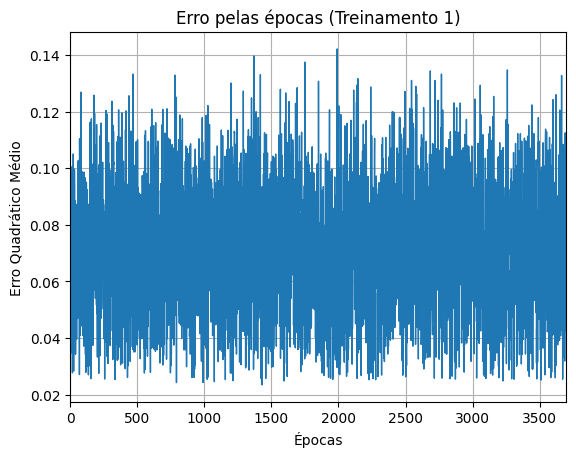

------------------------------
Treinamento numero: 2
------------------------------
epoca1 - 0.003188013368878615 < 1e-05
epoca2 - 0.003590421314575508 < 1e-05
epoca3 - 0.009392952549798411 < 1e-05
epoca4 - 0.05660303194579212 < 1e-05
epoca5 - 0.01896844939724982 < 1e-05
epoca6 - 0.02779965214233341 < 1e-05
epoca7 - 0.06159250956255518 < 1e-05
epoca8 - 0.002753366325892362 < 1e-05
epoca9 - 0.027163222084435612 < 1e-05
epoca10 - 0.02863103431713339 < 1e-05
epoca11 - 0.06321321251490519 < 1e-05
epoca12 - 0.0592570732335822 < 1e-05
epoca13 - 0.06497046639211161 < 1e-05
epoca14 - 0.03787653048921173 < 1e-05
epoca15 - 0.03879530151462073 < 1e-05
epoca16 - 0.0361494611329993 < 1e-05
epoca17 - 0.032724719734038676 < 1e-05
epoca18 - 0.015766544845275884 < 1e-05
epoca19 - 0.06225478142360427 < 1e-05
epoca20 - 0.01852505707717212 < 1e-05
epoca21 - 0.0007876429726108025 < 1e-05
epoca22 - 0.06677796822714432 < 1e-05
epoca23 - 0.06440172102955444 < 1e-05
epoca24 - 0.01886477777941352 < 1e-05
epoca2

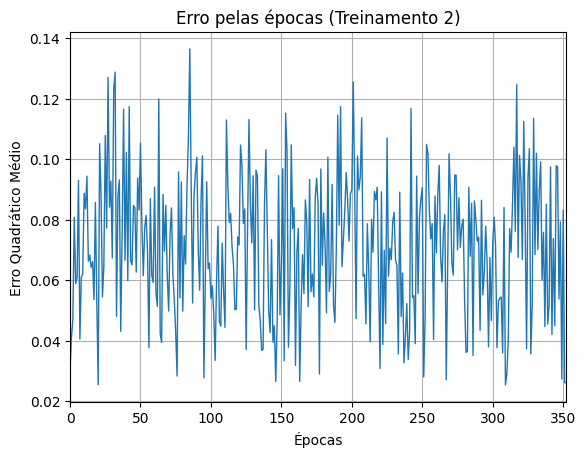

------------------------------
Treinamento numero: 3
------------------------------
epoca1 - 0.061428569769221945 < 1e-05
epoca2 - 0.06058506750154617 < 1e-05
epoca3 - 0.06541592569094978 < 1e-05
epoca4 - 0.01163081374072003 < 1e-05
epoca5 - 0.02631423879526347 < 1e-05
epoca6 - 0.029675495254510402 < 1e-05
epoca7 - 0.0654315505386881 < 1e-05
epoca8 - 0.03521744730933142 < 1e-05
epoca9 - 0.002213160026028685 < 1e-05
epoca10 - 0.002511149359682864 < 1e-05
epoca11 - 0.008380146026889627 < 1e-05
epoca12 - 0.006760903893741739 < 1e-05
epoca13 - 0.002619585331586634 < 1e-05
epoca14 - 0.05810413586572244 < 1e-05
epoca15 - 0.06615372203920418 < 1e-05
epoca16 - 0.010365241449489762 < 1e-05
epoca17 - 0.06057991659527735 < 1e-05
epoca18 - 0.06291548252187837 < 1e-05
epoca19 - 0.0679315743057381 < 1e-05
epoca20 - 0.016789844124744782 < 1e-05
epoca21 - 0.002078292378592028 < 1e-05
epoca22 - 0.025873585685763735 < 1e-05
epoca23 - 0.05670988033991043 < 1e-05
epoca24 - 0.023515489042721195 < 1e-05
epo

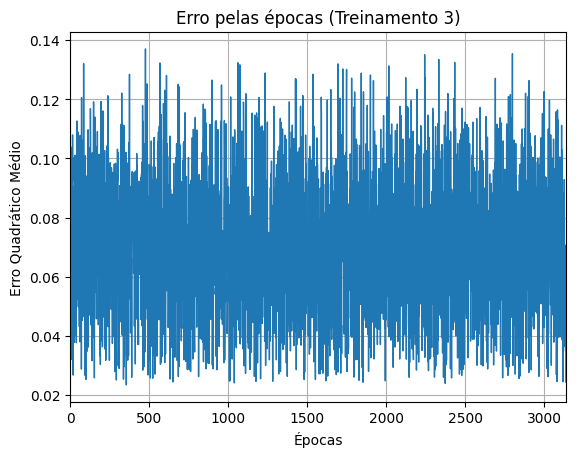

------------------------------
Treinamento numero: 4
------------------------------
epoca1 - 0.0053573888954234344 < 1e-05
epoca2 - 0.06568419919758735 < 1e-05
epoca3 - 0.04752727058644818 < 1e-05
epoca4 - 0.015332973658364328 < 1e-05
epoca5 - 0.05711352058783131 < 1e-05
epoca6 - 0.0073009234591409 < 1e-05
epoca7 - 0.013706390433888056 < 1e-05
epoca8 - 0.06705713252649495 < 1e-05
epoca9 - 0.055624642744331404 < 1e-05
epoca10 - 0.016478311365941183 < 1e-05
epoca11 - 0.001706690451817601 < 1e-05
epoca12 - 0.06862302949057444 < 1e-05
epoca13 - 0.010299899716209059 < 1e-05
epoca14 - 0.06717448949160501 < 1e-05
epoca15 - 0.019845083024774092 < 1e-05
epoca16 - 0.04410641454982357 < 1e-05
epoca17 - 0.0644270206676646 < 1e-05
epoca18 - 0.001217638429217023 < 1e-05
epoca19 - 0.022469001666282046 < 1e-05
epoca20 - 0.03240121964241798 < 1e-05
epoca21 - 0.06762226015681576 < 1e-05
epoca22 - 0.05364706716899674 < 1e-05
epoca23 - 0.06262301560680789 < 1e-05
epoca24 - 0.04133796857454711 < 1e-05
epoc

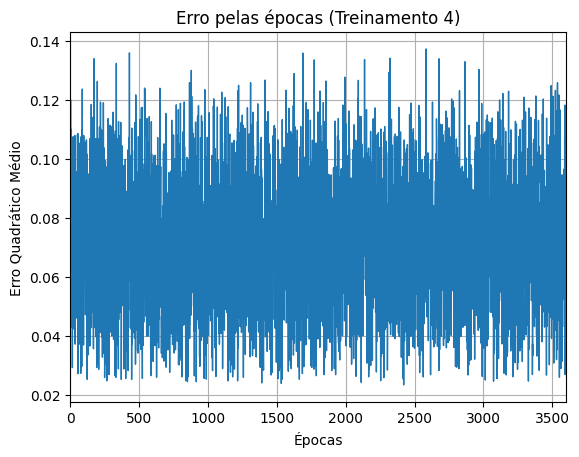

------------------------------
Treinamento numero: 5
------------------------------
epoca1 - 0.05832858695839477 < 1e-05
epoca2 - 0.00036563404732346816 < 1e-05
epoca3 - 0.0024364226489401487 < 1e-05
epoca4 - 0.03664841225914851 < 1e-05
epoca5 - 0.05262526127863586 < 1e-05
epoca6 - 0.03310447445524309 < 1e-05
epoca7 - 0.06665519098616363 < 1e-05
epoca8 - 0.04683480425799213 < 1e-05
epoca9 - 0.0026253217116119915 < 1e-05
epoca10 - 0.021130867183680676 < 1e-05
epoca11 - 0.0025523802769683857 < 1e-05
epoca12 - 0.06258356834894349 < 1e-05
epoca13 - 0.051569930311577736 < 1e-05
epoca14 - 0.06359758686165141 < 1e-05
epoca15 - 0.02780363149991011 < 1e-05
epoca16 - 0.003365443013198202 < 1e-05
epoca17 - 0.020848993326517025 < 1e-05
epoca18 - 0.002219882732232427 < 1e-05
epoca19 - 0.025103434869584808 < 1e-05
epoca20 - 0.04702132047838191 < 1e-05
epoca21 - 0.026629622030879194 < 1e-05
epoca22 - 0.027268811734496197 < 1e-05
epoca23 - 0.0375964909966755 < 1e-05
epoca24 - 0.05435706328289945 < 1e-

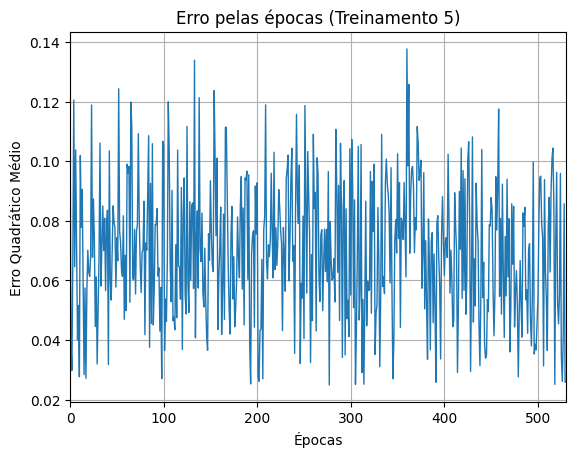

In [324]:
lista_Wi_1, lista_Wi_2, lista_W_1_bp, lista_W_2_bp = treinamento(X, d, n, MAX_EPOCA, p, 0.75)

### Teste da rede neural

---

In [282]:
data_teste = pd.read_csv('data_teste_58_RNA.txt', delim_whitespace=True)

In [283]:
# Separacao dos dados de teste

x1_teste = data_teste['x1'].copy()
x2_teste = data_teste['x2'].copy()
x3_teste = data_teste['x3'].copy()
X_teste = pd.concat([x1_teste, x2_teste, x3_teste], axis=1)

# Adiciona coluna do limiar de ativacao = -1 (bias) no conjunto de dados
X_teste['bias'] = -1

d_teste = data_teste['d'].copy()

In [284]:
X_teste = np.array(X_teste)

d_teste = np.array(d_teste)
d_teste = d_teste.reshape(-1, 1)

In [294]:
def teste(X_teste, d_teste, lista_W_1_bp, lista_W_2_bp, beta):

    # Vetor de erros
    erro = np.zeros(5)

    # Vetor de variancia
    variancia = np.zeros(5)

    # Lista de previsao
    lista_Y_2 = []

    # contador -> c

    for n_teste in range(5):

        print('-'*30)
        print(f'Teste numero: {n_teste + 1}')
        print('-'*30)

        #######################
        # ETAPAS FEED FORWARD #
        #######################
        
        # entradas I_1 e saida Y_1 da camada 1

        I_1 = X_teste.dot(lista_W_1_bp[n_teste].T)

        Y_1 = func_ativacao(I_1, beta)

        # Adicao do bias
        Y_1 = pd.DataFrame(Y_1)
        Y_1['bias'] = -1
        Y_1 = np.array(Y_1)
        
        # entrada I_2 e saida Y_2 da camada 2 de saída

        I_2 = (Y_1).dot(lista_W_2_bp[n_teste].T)

        Y_2 = func_ativacao(I_2, beta)

        # Erro Relativo da previsao FOWARD
        erro[n_teste] = np.mean(((np.abs(d_teste - Y_2))/(np.abs(d_teste)))*100)

        # Variancia da previsao FOWARD
        variancia[n_teste] = (np.sum((d_teste - Y_2) ** 2))/(len(d_teste)-1)

        print(f'Erro Relativo Médio = {erro[n_teste]}')
        print(f'Variancia = {variancia[n_teste]}')

        lista_Y_2.append(Y_2)

    return lista_Y_2

In [325]:
previsar_RNA_58 = teste(X_teste, d_teste, lista_W_1_bp, lista_W_2_bp, 0.75)

------------------------------
Teste numero: 1
------------------------------
Erro Relativo Médio = 23.946985858624107
Variancia = 0.030002049465444252
------------------------------
Teste numero: 2
------------------------------
Erro Relativo Médio = 21.744382663733454
Variancia = 0.017935822665010176
------------------------------
Teste numero: 3
------------------------------
Erro Relativo Médio = 20.60727297239324
Variancia = 0.016389158024691795
------------------------------
Teste numero: 4
------------------------------
Erro Relativo Médio = 23.0276623515382
Variancia = 0.02737892600922886
------------------------------
Teste numero: 5
------------------------------
Erro Relativo Médio = 21.66125705220404
Variancia = 0.0176847392714702


### Resultados

---

In [326]:
resultados = data_teste.copy()

In [327]:
for i, matriz in enumerate(previsar_RNA_58):

    resultados[f'y (T{i+1})'] = matriz

In [328]:
resultados

,x1,x2,x3,d,y (T1),y (T2),y (T3),y (T4),y (T5)
0,0.0611,0.2860,0.7464,0.4831,0.493725,0.593170,0.580655,0.504074,0.592540
1,0.5102,0.7464,0.0860,0.5965,0.492046,0.607679,0.612509,0.516073,0.605092
2,0.0004,0.6916,0.5006,0.5318,0.491511,0.602033,0.597035,0.515692,0.595990
3,0.9430,0.4476,0.2648,0.6843,0.505581,0.614667,0.620310,0.515208,0.619742
4,0.1399,0.1610,0.2477,0.2872,0.472830,0.571142,0.557983,0.484159,0.571806
5,0.6423,0.3229,0.8567,0.7663,0.516979,0.619402,0.616951,0.521208,0.624211
6,0.6492,0.0007,0.6422,0.5666,0.501327,0.596360,0.587742,0.498412,0.604006
7,0.1818,0.5078,0.9046,0.6601,0.508964,0.613984,0.607778,0.522558,0.612627
8,0.7382,0.2647,0.1916,0.5427,0.492069,0.596047,0.594886,0.499605,0.600795
9,0.3879,0.1307,0.8656,0.5836,0.505111,0.601596,0.591093,0.506594,0.605911


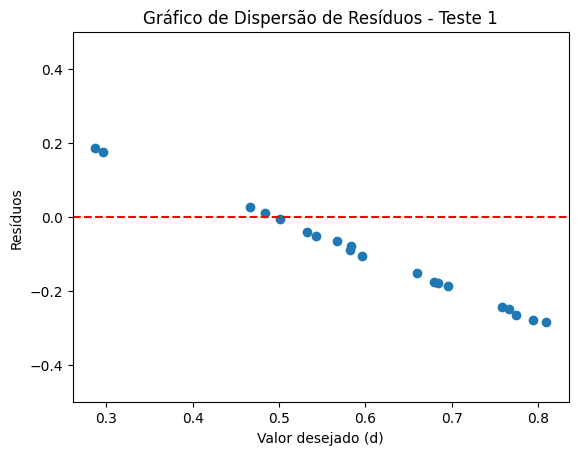

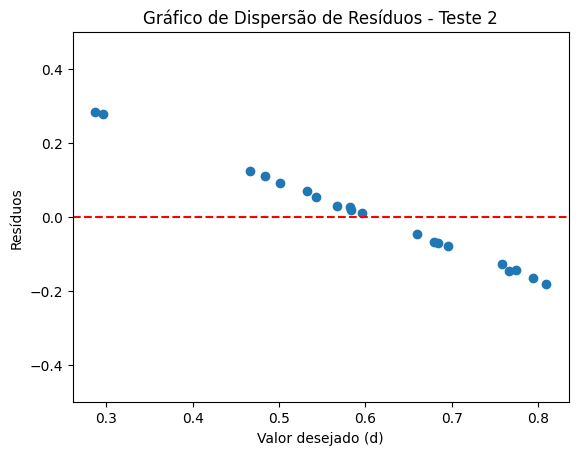

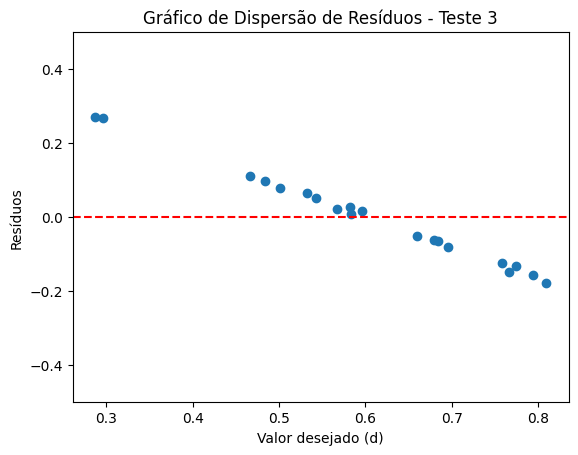

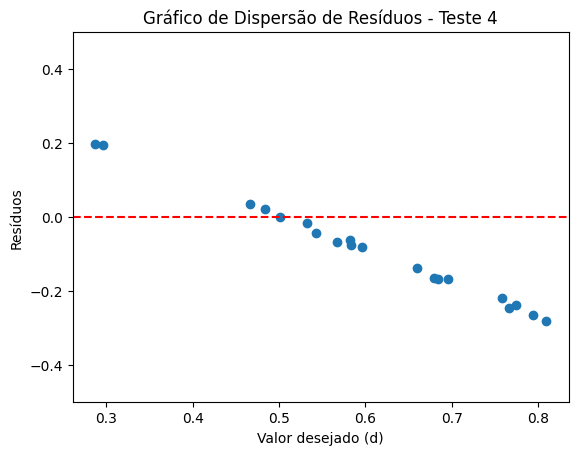

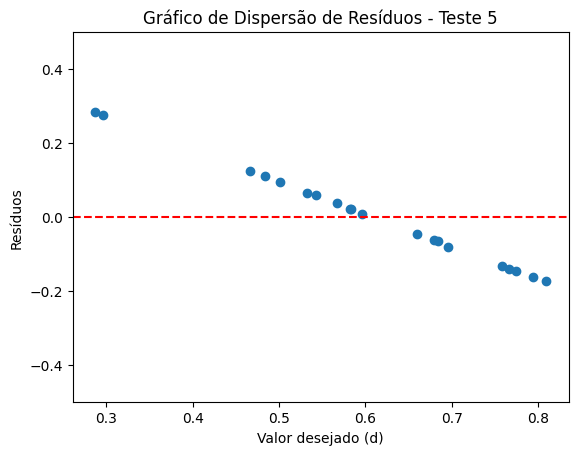

In [329]:
for c in range(5):
    # Calcular os resíduos
    resultados[f'Resíduos (T{c+1})'] = resultados[f'y (T{c+1})'] - resultados['d']
    
    # Criar um Gráfico de Dispersão de Resíduos
    plt.scatter(resultados['d'], resultados[f'Resíduos (T{c+1})'])
    
    # Adicionar uma linha horizontal no eixo zero na cor vermelha
    plt.axhline(0, color='red', linestyle='--')
    
    # Definir o tamanho do eixo y
    plt.ylim(-0.5, 0.5)
    
    # Configurar os rótulos dos eixos e o título do gráfico
    plt.xlabel('Valor desejado (d)')
    plt.ylabel('Resíduos')
    plt.title(f'Gráfico de Dispersão de Resíduos - Teste {c+1}')
    
    plt.savefig(f'Fig/EPC5_Dispersao_erro{c + 1}.pdf', format='pdf')

    # Exibir o gráfico
    plt.show()